## Pandas Profiling: USA Air Pollution Data
Source of data: https://data.world/data-society/us-air-pollution-data

The autoreload instruction reloads modules automatically before code execution, which is helpful for the update below.

In [1]:
%load_ext autoreload
%autoreload 2 

#%load_ext autoreload # Load the autoreload extension
#%autoreload 2 # Autoreload all modules

Make sure that we have the latest version of pandas-profiling.

# Hide output

In [2]:
%%capture 
import sys

## Install the pandas-profiling package

## Install the jupyter_contrib_nbextensions package

## Enable the ipywidgets extension

In [3]:
!{sys.executable} -m pip install -U pandas-profiling[notebook] 

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#%pip install jupyter-contrib-nbextensions

In [5]:
%pip show jupyter_contrib_nbextensions

Name: jupyter_contrib_nbextensions
Version: 0.7.0
Summary: A collection of Jupyter nbextensions.
Home-page: https://github.com/ipython-contrib/jupyter_contrib_nbextensions.git
Author: ipython-contrib and jupyter-contrib developers
Author-email: jupytercontrib@gmail.com
License: BSD
Location: c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: ipython-genutils, jupyter-contrib-core, jupyter-core, jupyter-highlight-selected-word, jupyter-nbextensions-configurator, lxml, nbconvert, notebook, tornado, traitlets
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
!jupyter nbextension enable --py widgetsnbextension 

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [7]:
!jupyter nbextension list

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


You might want to restart the kernel now.

### Import libraries

In [8]:
#%pip install ydata-profiling

In [9]:
%pip show ydata-profiling

Name: ydata-profiling
Version: 4.9.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd

from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

AttributeError: module 'numba' has no attribute 'generated_jit'

### Load and prepare the dataset

In [ ]:
file_name = cache_file(
    "uspollution_pollution_us_2000_2016.csv",
    "https://query.data.world/s/mz5ot3l4zrgvldncfgxu34nda45kvb",
)

df = pd.read_csv(file_name, index_col=[0])

In [ ]:
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1746661 entries, 0 to 24603
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value   float6

In [ ]:
# filter the df to only include state == 'Oregon' and count the number of rows
oregon_df = df[df['State'] == 'Oregon']
oregon_df.shape[0]

11794

In [ ]:

# We will only consider the data from Arizone state for this example
df = df[df["State"] == "Oregon"]
df["Date Local"] = pd.to_datetime(df["Date Local"])

In [ ]:
df.shape

(11794, 28)

### Multi-entity time-series

In [ ]:
# print the unique value for each column
for col in df.columns:
    print(f"Unique values for {col} are: {df[col].unique()}")

Unique values for State Code are: [41]
Unique values for County Code are: [51]
Unique values for Site Num are: [80]
Unique values for Address are: ['SE LAFAYETTE/5824 SE LAFAYETTE']
Unique values for State are: ['Oregon']
Unique values for County are: ['Multnomah']
Unique values for City are: ['Portland']
Unique values for Date Local are: <DatetimeArray>
['2007-05-02 00:00:00', '2007-05-03 00:00:00', '2007-05-04 00:00:00',
 '2007-05-05 00:00:00', '2007-05-06 00:00:00', '2007-05-07 00:00:00',
 '2007-05-08 00:00:00', '2007-05-09 00:00:00', '2007-05-10 00:00:00',
 '2007-05-11 00:00:00',
 ...
 '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00',
 '2015-12-25 00:00:00', '2015-12-26 00:00:00', '2015-12-27 00:00:00',
 '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00',
 '2015-12-31 00:00:00']
Length: 2949, dtype: datetime64[ns]
Unique values for NO2 Units are: ['Parts per billion']
Unique values for NO2 Mean are: [16.       12.083333 11.782609 ... 19.320833 14

The support to time series can be enabled by passing the parameter tsmode=True to the ProfileReport when its enabled, pandas profiling will try to identify time-dependent features using the feature's autocorrelation, which requires a sorted DataFrame or the definition of the `sortby` parameter.

When a feature is identified as time series will trigger the following changes:
   - the histogram will be replaced by a line plot
   - the feature details will have a new tab with autocorrelation and partial autocorrelation plots
   - two new warnings: `NON STATIONARY` and `SEASONAL` (which indicates that the series may have seasonality)

In cases where the data has multiple entities,  as in this example, where we have different meteorological stations, each station can be interpreted as a time series, its necessary to filter the entities and profile each station separately.

The following plot showcases the amount of data for each entity over time. In this case the data from the stations started being collected at the same period, and the data is collected hourly so they have the same amount of data per period.

c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\visualisation\plot.py:841: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([entity_column, "__bins"])[sortbykey].count()
c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\visualisation\plot.py:844: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(values=sortbykey, index="__bins", columns=entity_column)


<Axes: xlabel='Time'>

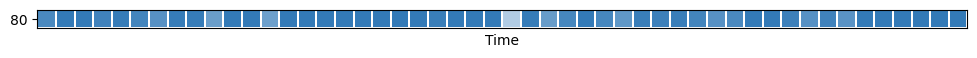

In [ ]:
from ydata_profiling.visualisation.plot import timeseries_heatmap

timeseries_heatmap(dataframe=df, entity_column="Site Num", sortby="Date Local")

In [ ]:
# Return the profile per station
for group in df.groupby("Site Num"):
    # Running 1 profile per station
    profile = ProfileReport(
        group[1],
        tsmode=True,
        sortby="Date Local",
        # title=f"Air Quality profiling - Site Num: {group[0]}"
    )

    profile.to_file(f"Ts_Profile_{group[0]}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(
    group[1],
    tsmode=True,
    sortby="Date Local",
    # title=f"Air Quality profiling - Site Num: {group[0]}"
)

profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]